This notebook introduces the use of dictionaries for counting the frequency of some category of words in text, using sentiment (from the [AFINN sentiment lexicon](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010)) in the time series data of tweets as an example.

This notebook uses data from the AFINN sentiment lexicon; for other dictionaries in wide use, see [MPQA](https://mpqa.cs.pitt.edu/lexicons/subj_lexicon/) (free for use with registration) and [LIWC](http://liwc.wpengine.com) (commercial).

Before running this notebook, install pandas:

```sh
source activate anlp
conda install pandas=0.24.0
conda install matplotlib=3.0.2
```

In [1]:
import json
import nltk
import pandas as pd
import matplotlib

In [2]:
# read in json file of tweets and return a list of (date, tokenized text)
def read_tweets_from_json(filename):
    
    tweets=[]
    with open(filename, encoding="utf-8") as file:
        data=json.load(file)
        for tweet in data:
            created_at=tweet["created_at"]
            date = pd.to_datetime(created_at)
            text=tweet["text"]
            tokens=nltk.casual_tokenize(text)
            tweets.append((date, tokens))
    return tweets

In [3]:
# read in list of (date, tokens) tweets and count whether each tweet contains 
# a (lowercased) term in the argument dictionary.  Return as pandas dataframe
# for easier slicing/plotting)
def dictionary_document_count(data, dictionary):
    counted=[]
    for date, tokens in data:
        val=0
        for word in tokens:
            if word.lower() in dictionary:
                val=1
        counted.append((date, val))
    df=pd.DataFrame(counted, columns=['date','document frequency'])
    return df

In [4]:
tweets=read_tweets_from_json("../data/trump_tweets.json")

Here we'll define our own "immigration" dictionary by selecting words that we hypothesize are often found in the topic of immigration.

In [5]:
immigration_dictionary=set(["wall", "border", "borders", "immigrants","immigration"])

In [6]:
counts=dictionary_document_count(tweets, immigration_dictionary)

In [7]:
def plot_time(counts):
    
    # for this exercise, let's just keep tweets published after 2015
    counts=counts[(counts['date'] > '2015-01-01')]
    
    # counts is a pandas dataframe; let's aggregate the counts by month.  
    # Can also aggregate by "D" for day, "W" for week, "Y" for year.
    means=counts.resample('M', on='date').mean() 
    
    means.plot()

In [8]:
# You might need to run this command twice if you get a warning
plot_time(counts)

/anaconda3/envs/anlp/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


Q1: The AFINN dictionary is a sentiment lexicon, where words are rated on a five-point affect scale (-5 = most negative, 5 = most positive).  Write a function `read_AFINN_dictionary` to read in this file and create two dictionaries like that above -- one for positive terms and one for negative terms.  How did you decide the cutoff point for positive and negative?

In [9]:
def read_AFINN_dictionary(filename):
    positive=[]
    negative=[]
    with open('../data/AFINN-111.txt', 'r') as f: #open the file
        contents = f.read() 
        contents=contents.split('\n')
        new_content=[]
        for i in contents:
            new_content+=[i.replace("\t","*&*%")]
    
        contents_new=[s.split("*&*%") for s in new_content]
        contents_new=[(i[0],int(i[1])) for i in contents_new]
        contents_new=[(word,int(value)) for word,value in contents_new]
        for i,v in contents_new:
            if v >0:
                positive.append(i)
            else:
                negative.append(i)
    
    # Your code here
    
    return set(positive), set(negative)

In [10]:
positive, negative=read_AFINN_dictionary("../data/AFINN-111.txt")

Q2: Create a plot (like that above) using the negative sentiment dictionary you created

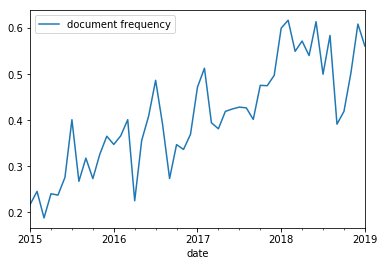

In [11]:
counts=dictionary_document_count(tweets, negative)
plot_time(counts)

Q3: Create a new dictionary of your own for a concept you'd like to measure in `trump_tweets.json` or `aoc_tweets.json`.  The dictionary must contain at least 10 terms; you're free to create one for any category (except sentiment!), so be creative--we'll be comparing these in class on Thursday. Create a plot using that dictionary and data below.

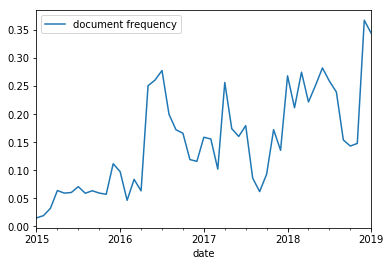

In [14]:
ayos_dictionary=["losers","brooklyn","russians","hillary", "wall", "china", "trade", "saudi", "democrats","media", "mexico", "canada"]
counts=dictionary_document_count(tweets, ayos_dictionary)
plot_time(counts)

Q4 (check-plus): for each of the terms in your dictionary, write a function `print_examples(tweets, dictionary)` to find one tweet that contains that term and print it out for your inspection.  Is that term used in the same sense you expected?

In [16]:
def print_examples(tweets, dictionary):
    for date, tokens in tweets:
        for word in tokens:
            if word.lower() in dictionary:
                print(date,tokens)


In [17]:
print_examples(tweets, ayos_dictionary)

2019-01-19 14:09:37+00:00 ['Mexico', 'is', 'doing', 'NOTHING', 'to', 'stop', 'the', 'Caravan', 'which', 'is', 'now', 'fully', 'formed', 'and', 'heading', 'to', 'the', 'United', 'States', '.', 'We', 'stopped', 'the', 'last', 'two', '-', 'many', 'are', 'still', 'in', 'Mexico', 'but', 'can', '’', 't', 'get', 'through', 'our', 'Wall', ',', 'but', 'it', 'takes', 'a', 'lot', 'of', 'Border', 'Agents', 'if', 'there', 'is', 'no', 'Wall', '.', 'Not', 'easy', '!']
2019-01-19 14:09:37+00:00 ['Mexico', 'is', 'doing', 'NOTHING', 'to', 'stop', 'the', 'Caravan', 'which', 'is', 'now', 'fully', 'formed', 'and', 'heading', 'to', 'the', 'United', 'States', '.', 'We', 'stopped', 'the', 'last', 'two', '-', 'many', 'are', 'still', 'in', 'Mexico', 'but', 'can', '’', 't', 'get', 'through', 'our', 'Wall', ',', 'but', 'it', 'takes', 'a', 'lot', 'of', 'Border', 'Agents', 'if', 'there', 'is', 'no', 'Wall', '.', 'Not', 'easy', '!']
2019-01-19 14:09:37+00:00 ['Mexico', 'is', 'doing', 'NOTHING', 'to', 'stop', 'the', 

2018-05-16 13:09:19+00:00 ['The', 'Washington', 'Post', 'and', 'CNN', 'have', 'typically', 'written', 'false', 'stories', 'about', 'our', 'trade', 'negotiations', 'with', 'China', '.', 'Nothing', 'has', 'happened', 'with', 'ZTE', 'except', 'as', 'it', 'pertains', 'to', 'the', 'larger', 'trade', 'deal', '.', 'Our', 'country', 'has', 'been', 'losing', 'hundreds', 'of', 'billions', 'of', 'dollars', 'a', 'year', 'with', 'China', '...']
2018-05-15 14:08:21+00:00 ['Can', 'you', 'believe', 'that', 'with', 'all', 'of', 'the', 'made', 'up', ',', 'unsourced', 'stories', 'I', 'get', 'from', 'the', 'Fake', 'News', 'Media', ',', 'together', 'with', 'the', '$', '10,000', ',', '000', 'Russian', 'Witch', 'Hunt', '(', 'there', 'is', 'no', 'Collusion', ')', ',', 'I', 'now', 'have', 'my', 'best', 'Poll', 'Numbers', 'in', 'a', 'year', '.', 'Much', 'of', 'the', 'Media', 'may', 'be', 'corrupt', ',', 'but', 'the', 'People', 'truly', 'get', 'it', '!']
2018-05-15 14:08:21+00:00 ['Can', 'you', 'believe', 'that'

2016-10-02 11:35:00+00:00 ['I', 'have', 'created', 'tens', 'of', 'thousands', 'of', 'jobs', 'and', 'will', 'bring', 'back', 'great', 'American', 'prosperity', '.', 'Hillary', 'has', 'only', 'created', 'jobs', 'at', 'the', 'FBI', 'and', 'DOJ', '!']
2016-10-01 21:25:52+00:00 ['Wow', ',', 'just', 'saw', 'the', 'really', 'bad', '@CNN', 'ratings', '.', 'People', "don't", 'want', 'to', 'watch', 'bad', 'product', 'that', 'only', 'builds', 'up', 'Crooked', 'Hillary', '.']
2016-10-01 17:01:31+00:00 ['Crooked', 'H', 'is', 'nasty', 'to', 'Sanders', 'supporters', 'behind', 'closed', 'doors', '.', 'Owned', 'by', 'Wall', 'St', 'and', 'Politicians', ',', 'HRC', 'is', 'not', 'with', 'you', '.', 'https://t.co/WN1lyCDXla']
2016-09-30 18:24:21+00:00 ['Why', "isn't", 'Hillary', '50', 'points', 'ahead', '?', 'Maybe', "it's", 'the', 'email', 'scandal', ',', 'policies', 'that', 'spread', 'ISIS', ',', 'or', 'calling', 'millions', 'of', '…', 'https://t.co/yKz9vCz8O1']
2016-09-30 12:50:48+00:00 ['Remember', ','

2015-06-27 17:17:08+00:00 ['Only', 'very', 'stupid', 'people', 'think', 'that', 'the', 'United', 'States', 'is', 'making', 'good', 'trade', 'deals', 'with', 'Mexico.Mexico', 'is', 'killing', 'us', 'at', 'the', 'border', 'and', 'at', 'trade', '!']
2015-06-27 17:17:08+00:00 ['Only', 'very', 'stupid', 'people', 'think', 'that', 'the', 'United', 'States', 'is', 'making', 'good', 'trade', 'deals', 'with', 'Mexico.Mexico', 'is', 'killing', 'us', 'at', 'the', 'border', 'and', 'at', 'trade', '!']
2015-06-26 15:13:06+00:00 ['.', '@Univision', 'cares', 'far', 'more', 'about', 'Mexico', 'than', 'it', 'does', 'about', 'the', 'U', '.', 'S', '.', 'Are', 'they', 'controlled', 'by', 'the', 'Mexican', 'government', '?']
2015-06-26 14:07:44+00:00 ['Anyone', 'who', 'wants', 'strong', 'borders', 'and', 'good', 'trade', 'deals', 'for', 'the', 'US', 'should', 'boycott', '@Univision', '.']
2015-06-25 14:27:45+00:00 ['I', 'love', 'Mexico', 'but', 'not', 'the', 'unfair', 'trade', 'deals', 'that', 'the', 'US', 

2013-03-15 21:25:18+00:00 ['Via', '@BreitbartNews', ':', '“', 'EXCLUSIVE', ':', 'TRUMP', 'SMACKS', 'BACK', 'AGAINST', 'MEDIA', 'ATTACKS', 'ON', 'CPAC', 'SPEECH', '”', 'http://t.co/oIDZHOQa6I', 'by', '@mboyle1']
2013-03-08 19:46:19+00:00 ['Surprise', '–', 'China', 'has', 'spies', 'throughout', 'NASA', 'stealing', 'our', 'R', '&', 'D', 'http://t.co/e3MjOud1mU', 'When', 'will', 'we', 'ever', 'make', 'them', 'pay', 'for', 'espionage', '?']
2013-03-04 20:10:26+00:00 ['China', 'has', 'announced', 'it', 'is', '“', 'fully', 'prepared', '”', 'for', 'a', 'currency', 'war', 'http://t.co/e9ZE2OrLqn', 'Outrageous', '-', 'they', 'have', 'no', 'fear', 'of', 'our', 'leaders', '.']
2013-03-03 23:58:56+00:00 ['Losers', 'and', 'haters', ',', 'even', 'you', ',', 'as', 'low', 'and', 'dumb', 'as', 'you', 'are', ',', 'can', 'learn', 'from', 'watching', 'Apprentice', 'and', 'checking', 'out', 'my', 'tweets-you', 'can', 'still', 'succeed', '!']
2013-03-03 22:56:49+00:00 ['Losers', 'and', 'haters', 'are', 'invi